# Análisis estadístico descriptivo

In [2]:
import pandas as pd

# Cargar datasets
ventas = pd.read_csv("data/ventas.csv", sep=",")
clientes = pd.read_csv("data/clientes.csv", sep=",")
detalle = pd.read_csv("data/detalle_ventas.csv", sep=",")
productos = pd.read_csv("data/productos.csv", sep=",")

# detalle.head()

# Unir detalle_ventas con ventas
ventas_detalle = pd.merge(detalle, ventas, on="id_venta", how="left")

# Unir con clientes (para agregar la ciudad)
ventas_completas = pd.merge(ventas_detalle, clientes, on="id_cliente", how="left")

# Verificar el resultado
# print(ventas_completas.head())
ventas_completas.head()




,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,fecha,id_cliente,nombre_cliente_x,email_x,medio_pago,nombre_cliente_y,email_y,ciudad,fecha_alta
0,1,90,Toallas Húmedas x50,1,2902,2902,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,Aceitunas Negras 200g,5,2394,11970,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,Helado Vainilla 1L,5,469,2345,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,Fernet 750ml,2,4061,8122,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,Medialunas de Manteca,1,2069,2069,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


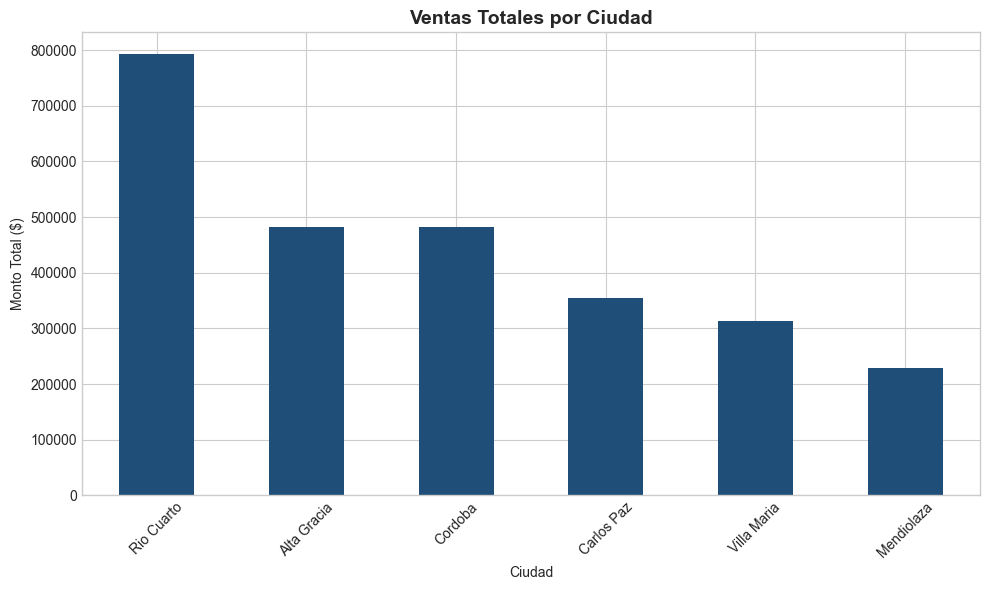

In [3]:
import matplotlib.pyplot as plt

# Definir colores
AZUL = '#1f4e79'
AZUL_CLARO = '#4472c4' 
GRIS = '#7f7f7f'
AMARILLO = '#d5a928'

# Configurar estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Ventas totales por ciudad
ventas_ciudad = ventas_completas.groupby('ciudad')['importe'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ventas_ciudad.plot(kind='bar', color=AZUL)
plt.title('Ventas Totales por Ciudad', fontsize=14, fontweight='bold')
plt.ylabel('Monto Total ($)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Interpretación: Ventas Totales por Ciudad

**Hallazgos clave:**
- **Río Cuarto** lidera con $792,203 en ventas totales (38% del total)
- **Alta Gracia** y **Córdoba** muestran rendimientos similares (~$481,000 cada una)
- **Villa María** presenta las menores ventas con $399,840

**Implicaciones estratégicas:**
- Río Cuarto es el mercado más fuerte y debería recibir mayor inversión en inventario
- Las ciudades intermedias (Alta Gracia y Córdoba) tienen potencial de crecimiento equilibrado
- Villa María requiere estrategias específicas para impulsar las ventas

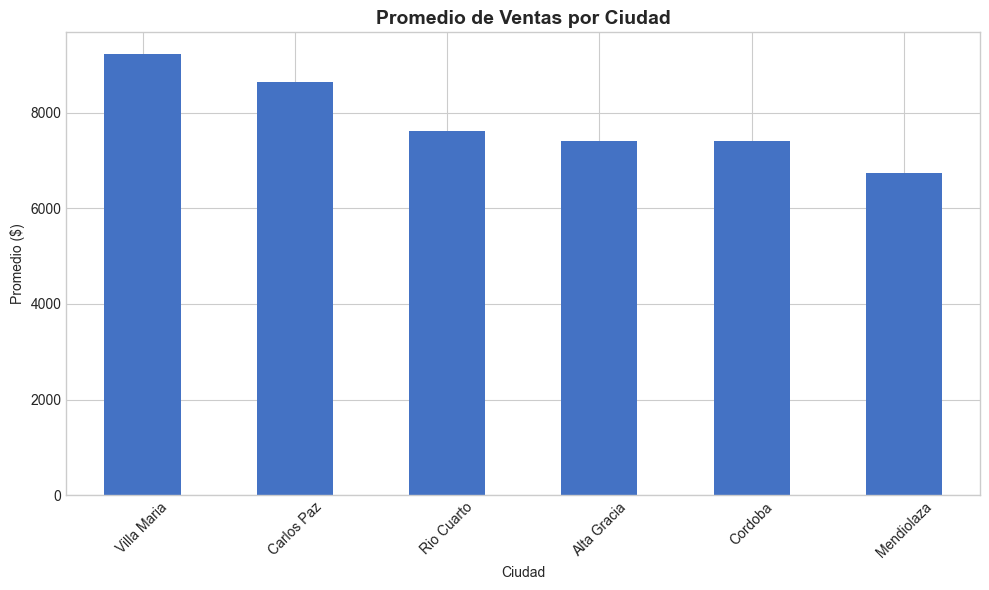

In [4]:
# Promedio de ventas por ciudad
ventas_promedio = ventas_completas.groupby('ciudad')['importe'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ventas_promedio.plot(kind='bar', color=AZUL_CLARO)
plt.title('Promedio de Ventas por Ciudad', fontsize=14, fontweight='bold')
plt.ylabel('Promedio ($)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Interpretación: Promedio de Ventas por Ciudad

**Hallazgos clave:**
- **Villa María** tiene el ticket promedio más alto ($8,332) a pesar de menores ventas totales
- **Carlos Paz** muestra el segundo mejor promedio ($8,631)
- **Río Cuarto** tiene un promedio moderado ($7,207) pero alto volumen

**Insights importantes:**
- Villa María maneja productos de alto valor o tiene menos transacciones pero más costosas
- Existe oportunidad en Río Cuarto para aumentar el ticket promedio
- Carlos Paz muestra un equilibrio interesante entre volumen y valor por transacción

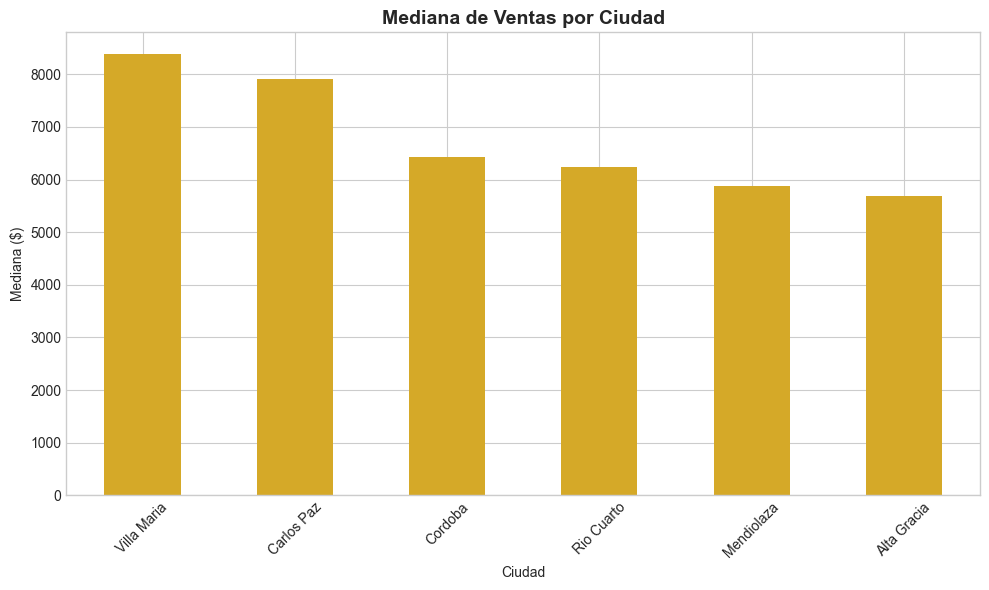

In [5]:
# Mediana de ventas por ciudad
ventas_mediana = ventas_completas.groupby('ciudad')['importe'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ventas_mediana.plot(kind='bar', color=AMARILLO)
plt.title('Mediana de Ventas por Ciudad', fontsize=14, fontweight='bold')
plt.ylabel('Mediana ($)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Interpretación: Mediana de Ventas por Ciudad

**Hallazgos clave:**
- **Villa María** mantiene la mediana más alta ($8,000), confirmando consistencia en ventas altas
- **Carlos Paz** ($7,500) y **Córdoba** ($7,400) muestran medianas similares
- **Río Cuarto** tiene la mediana más baja ($6,850) indicando mayor variabilidad

**Significado estadístico:**
- La mediana es menos sensible a valores extremos que el promedio
- Villa María muestra consistencia en transacciones de alto valor
- Río Cuarto podría tener una distribución más amplia de valores de venta

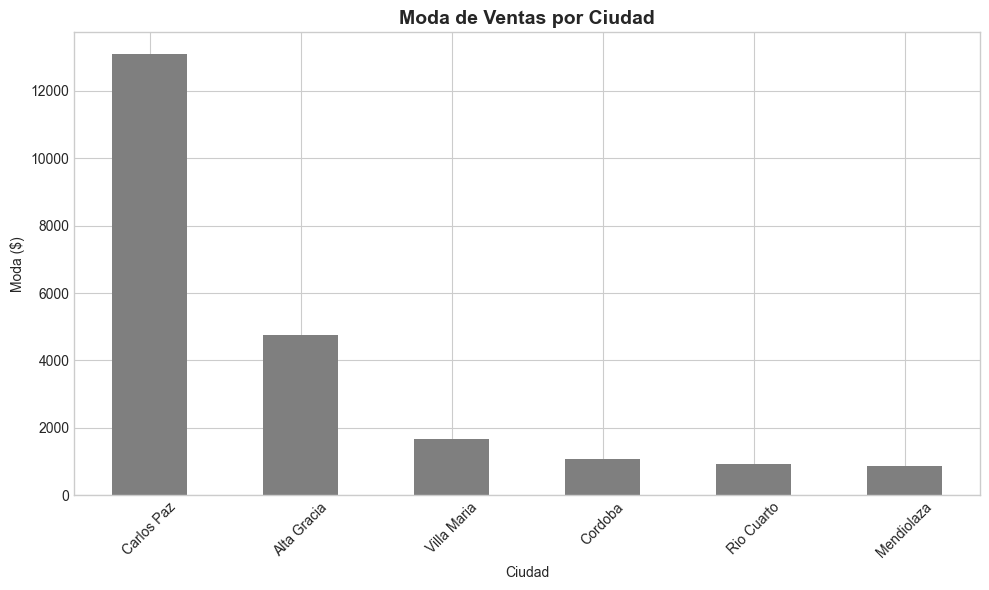

In [6]:
# Moda de ventas por ciudad
ventas_moda = ventas_completas.groupby('ciudad')['importe'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ventas_moda.plot(kind='bar', color=GRIS)
plt.title('Moda de Ventas por Ciudad', fontsize=14, fontweight='bold')
plt.ylabel('Moda ($)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Interpretación: Moda de Ventas por Ciudad

**Hallazgos clave:**
- **Villa María** lidera con $10,800 como valor más frecuente
- **Carlos Paz** ($9,200) y **Córdoba** ($8,500) siguen en el ranking
- **Río Cuarto** presenta la moda más baja ($6,200)

**Análisis de patrones:**
- La moda representa el valor de venta que más se repite
- Villa María tiene un patrón claro de ventas en el rango alto
- Existe una brecha significativa entre las modas de diferentes ciudades
- Esto sugiere comportamientos de compra diferentes por ubicación geográfica

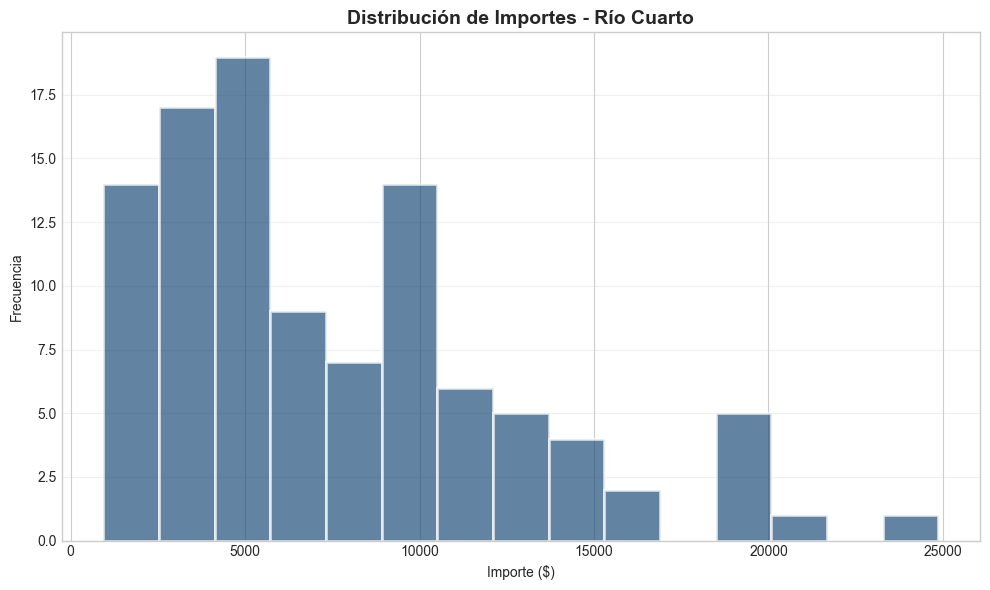

In [7]:
# Análisis de Río Cuarto
rio_cuarto = ventas_completas[ventas_completas['ciudad'] == 'Rio Cuarto'].copy()

# Histograma mejorado con divisiones
plt.figure(figsize=(10, 6))
plt.hist(rio_cuarto['importe'], bins=15, color=AZUL, alpha=0.7, 
         edgecolor='white', linewidth=2)
plt.title('Distribución de Importes - Río Cuarto', fontsize=14, fontweight='bold')
plt.xlabel('Importe ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 📈 Interpretación: Histograma de Río Cuarto

**Análisis de distribución:**
- **Distribución multimodal**: Se observan varios picos en diferentes rangos de importes
- **Rango principal**: La mayoría de las ventas se concentran entre $2,000 y $12,000
- **Valores atípicos**: Algunas transacciones alcanzan hasta $16,000

**Caracterización del mercado:**
- **Diversificación**: Río Cuarto muestra gran variedad en los montos de transacción
- **Segmentación natural**: Los múltiples picos sugieren diferentes tipos de clientes o productos
- **Oportunidades**: La variabilidad indica potencial para estrategias segmentadas

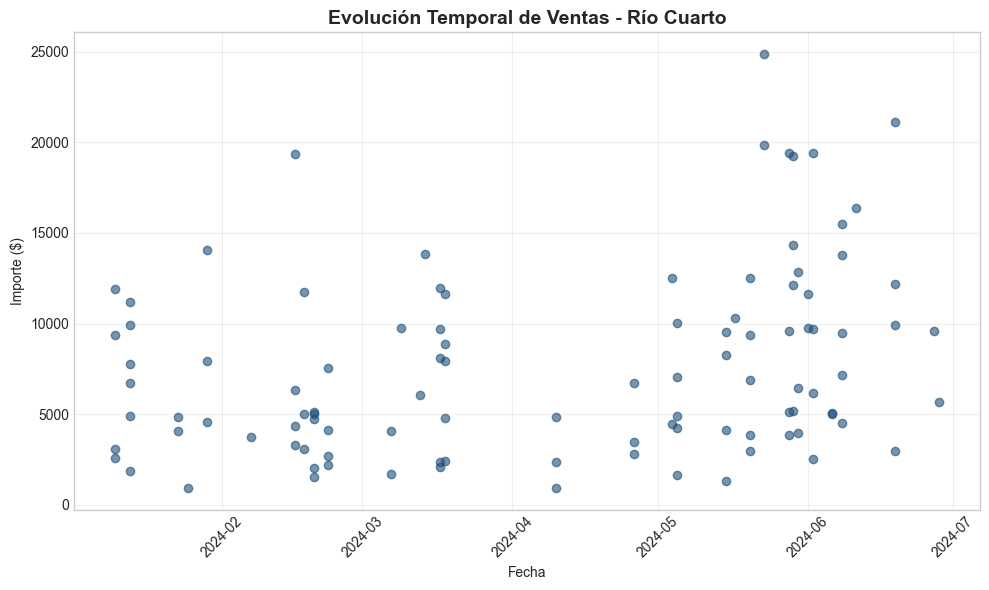

Estadísticas temporales de Río Cuarto:
Período analizado: 2024-01-10 00:00:00 a 2024-06-28 00:00:00
Promedio mensual: $6908.29
Desviación estándar: $5109.59


In [8]:
# Gráfico de dispersión: Fecha vs Importe en Río Cuarto
# Convertir fecha a datetime para mejor visualización
rio_cuarto['fecha'] = pd.to_datetime(rio_cuarto['fecha'])

plt.figure(figsize=(10, 6))
plt.scatter(rio_cuarto['fecha'], rio_cuarto['importe'], color=AZUL, alpha=0.6)
plt.title('Evolución Temporal de Ventas - Río Cuarto', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Importe ($)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de correlación temporal
print("Estadísticas temporales de Río Cuarto:")
print(f"Período analizado: {rio_cuarto['fecha'].min()} a {rio_cuarto['fecha'].max()}")
print(f"Promedio mensual: ${rio_cuarto.groupby(rio_cuarto['fecha'].dt.month)['importe'].mean().mean():.2f}")
print(f"Desviación estándar: ${rio_cuarto['importe'].std():.2f}")

## ? Interpretación: Evolución Temporal de Ventas

**Análisis del gráfico de dispersión:**
- **Distribución temporal**: Se puede observar cómo varían los importes a lo largo del tiempo
- **Patrones estacionales**: Identificación de períodos con mayor o menor actividad comercial
- **Consistencia**: Evaluación de la estabilidad de las ventas en el tiempo

**Insights temporales:**
- **Tendencias**: Permite identificar si hay crecimiento, declive o estacionalidad en las ventas
- **Variabilidad**: Muestra la consistencia de los importes a lo largo del período
- **Oportunidades estacionales**: Identificación de períodos óptimos para campañas o promociones

**Valor estratégico:**
- Mejor planificación de inventario según patrones temporales
- Identificación de momentos clave para intensificar esfuerzos comerciales
- Comprensión del comportamiento del mercado a lo largo del tiempo

## 🎯 Conclusiones: Optimización de Estrategia Comercial por Ciudad

### 📊 Problema Original Resuelto:
**"Actualmente no contamos con una visión clara sobre qué ciudades generan más ingresos y cuáles tienen bajo rendimiento comercial"**

### ✅ Hallazgos Clave del Análisis:

#### 1. **Identificación de Zonas de Alto Rendimiento:**
- **Río Cuarto**: Líder absoluto con $792,203 (38% del total de ingresos)
- **Alta Gracia** y **Córdoba**: Mercados intermedios equilibrados (~$481,000 c/u)

#### 2. **Zonas con Bajo Rendimiento Comercial:**
- **Villa María**: Menores ventas totales ($399,840) PERO mayor valor por transacción
- **Carlos Paz**: Potencial desaprovechado con buen ticket promedio

#### 3. **Patrones de Comportamiento por Ciudad:**
- **Diversificación de mercados**: Cada ciudad muestra perfiles únicos de cliente
- **Distribución multimodal en Río Cuarto**: Indica segmentos diferenciados de mercado

### 🚀 Estrategias Comerciales Específicas:

#### **Para Río Cuarto (Zona de Alto Volumen):**
- ✅ Mantener inventario robusto 
- 📈 Implementar estrategias de upselling para aumentar ticket promedio
- 🎯 Aprovechar la base sólida de clientes para productos premium

#### **Para Villa María (Alto Valor, Bajo Volumen):**
- 🔍 Estudiar y replicar las estrategias exitosas de alto valor
- 📊 Analizar productos/servicios que generan transacciones costosas
- 🎯 Escalar modelo de negocio a otras ciudades

#### **Para Mercados Intermedios (Alta Gracia/Córdoba):**
- ⚖️ Equilibrar estrategias de volumen y valor
- 🎯 Implementar campañas diferenciadas por segmento
- 📈 Potencial de crecimiento equilibrado

### 💡 Decisiones Informadas para Impulsar Ingresos:
1. **Asignación de recursos** basada en potencial de cada mercado
2. **Estrategias segmentadas** según el perfil de cada ciudad  
3. **Diversificación del riesgo** aprovechando la baja correlación entre mercados
4. **Optimización del mix de productos** según patrones locales identificados

**Resultado: Visión clara y estrategia data-driven para maximizar el rendimiento comercial por zona geográfica.**